QISHA_PlotROICounts.ipynb
Created by JFranco, 10 SEP 2023

This is the fifth module in the QISHA pipepline. It is meant for plotting the results of a single experiment (i.e., not intended for batch analysis). The code will read in all puncta counts from a single ROI directory and plot the results. 

In [83]:
#                           *** LIBRARIES ***
import datetime
import numpy as np
import os
import matplotlib.image
import matplotlib.pyplot as plt
from cellpose import models , plot
import imageio
import pandas as pd
import seaborn as sns

In [84]:
#                   *** GET TIME OF ANALYSIS START ***
# could turn this into a module?
toa = str(datetime.datetime.today()).split()                                   #Time of analysis
today = toa[0]
now = toa[1]
timestamp = today.replace('-','')+'-'+now.replace(':','')[:6]

In [85]:
#                   *** WHERE TO GET/SAVE DATA ***   
# Directories 
#   UPDATE THIS INFO TO REFLECT YOUR SYSTEM
dirMain = "/Users/joyfranco/Dropbox (Partners HealthCare)/JF_Shared/Data/CYS/CYS_002/"
dirPCs = dirMain+"ROIPuncta/PunctaCounts/"
dirMD = dirMain+"Metadata/"

#   ones that need to be made
dirAna = dirMain+"Analysis/"
dirTR = dirAna+"Plots."+timestamp+"/"

In [86]:
# Load the metadata
fnMD = "CYS_002.Metadata.Samples.csv"
dfMD = pd.read_csv(dirMD+fnMD)

In [87]:
print(dfMD)

  Slides  Column      Row  AnimalID             Genotype Sex      DOB  \
0    All       1  1 and 2       637  Ntng1Cre+/-;Ai14+/-   M   2/6/22   
1    All       2  1 and 2      1037  Ntng1Cre+/-;Ai14+/-   M  8/30/22   
2    All       3  1 and 2      1099  Ntng1Cre+/-;Ai14+/-   M   2/7/23   
3    All       4  1 and 2      1414  Ntng1Cre+/-;Ai14+/+   F  7/14/23   

   SacDate  AgeAtSac CollectionPrep        SampleID  
0  8/11/23       551     WSS_016.01             NaN  
1  8/11/23       346     WSS_016.03  CYS_002.S4.TS3  
2  8/11/23       185     WSS_016.05             NaN  
3  8/11/23        28     WSS_016.07             NaN  


In [88]:
# Create directory for storing ROIs and Masks
if not os.path.exists(dirAna):
    os.mkdir(dirAna)
if not os.path.exists(dirTR):
    os.mkdir(dirTR)

In [89]:
# Get list of Puncta Counts to plot  
os.chdir(dirPCs)
pcs = os.listdir()

In [90]:
# Iterate through the list and generate a dataframe of compiled data

# Initialize dataframe for storing pcs
dfAll = pd.DataFrame()

for pc in pcs:
    # Gather the metadata for this sample
    fnBase = pc.split(".PunctaCounts",1)[0]
    # Index of the sample in the metadata sheet
    inSamp = dfMD.index[dfMD['SampleID']==fnBase].tolist()[0]
    # Get sample specific details
    animalID = "AID"+str(dfMD.loc[inSamp]['AnimalID'])
    geno = dfMD.loc[inSamp]['Genotype']
    sex = dfMD.loc[inSamp]['Sex']
    age = str(dfMD.loc[inSamp]['AgeAtSac'])
    
    # Read in the puncta counts 
    df = pd.read_csv(dirPCs+pc)

    # Add metadata
    df["animalID"] = animalID
    df["geno"] = geno
    df["sex"] = sex
    df["age"] = age

    # Append to main df
    dfAll = pd.concat([dfAll, df])

In [91]:
print(dfAll)

          Count       ImageName  ROI_ID     Area      Mean  Min    Max  \
0      1      3  CYS_002.S4.TS3       1   81.847  1085.694  124   6202   
1      2      3  CYS_002.S4.TS3       2   96.859  1011.496   91  10915   
2      3      6  CYS_002.S4.TS3       3   96.591  1153.475   97   6598   
3      4      5  CYS_002.S4.TS3       4   73.185  1001.697  107   7926   
4      5      4  CYS_002.S4.TS3       5   98.294   815.238   99   5076   
..   ...    ...             ...     ...      ...       ...  ...    ...   
143  144      4  CYS_002.S4.TS3     144  103.282  1235.408  154   7867   
144  145      4  CYS_002.S4.TS3     145   76.592  1564.384  121   9933   
145  146      5  CYS_002.S4.TS3     146   89.584  1094.020   90  13852   
146  147      7  CYS_002.S4.TS3     147  102.795  1338.382  145  16586   
147  148      2  CYS_002.S4.TS3     148   61.142  1307.678  159   5275   

          Std animalID                 geno sex  age  
0    1004.333  AID1037  Ntng1Cre+/-;Ai14+/-   M  346  
1

/usr/local/Caskroom/miniconda/base/envs/QISHA/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x600 with 0 Axes>

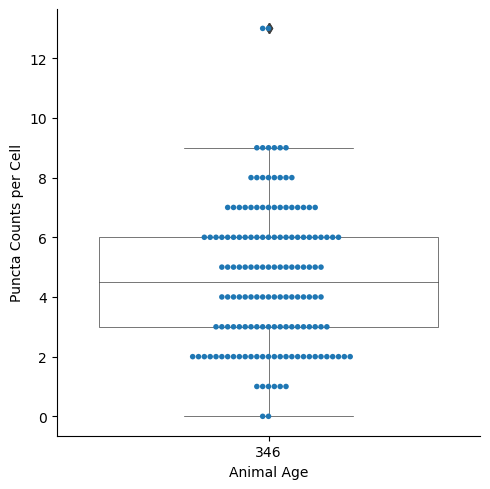

In [98]:
####### GENERATE PLOTS #######
# Plot Response Maximum Fold Change
#order=["37","371","545"]
order=["346"]
#colors = {"": "#882E72", '689': "#4EB265", '530': "#E8601C"}
plt.figure(figsize=(4, 6))
sns.catplot(x='age',y='Count', hue="animalID", 
            data=dfAll, kind="box",boxprops={'facecolor':'None'},linewidth=.5, 
            dodge=False, order=order, legend = False)
ax = sns.swarmplot(x='age', y='Count',hue="animalID", 
                   data=dfAll, 
                   dodge = False, size=4,  order=order, legend =False)
ax.set(xlabel='Animal Age', ylabel='Puncta Counts per Cell')
#ax.set(ylim=(0, 0.6))
#plt.xticks(rotation=45)
plt.savefig(dirTR+fnBase+".SwarmBoxPlot.png",  bbox_inches='tight', dpi = 300,
            format = "png")

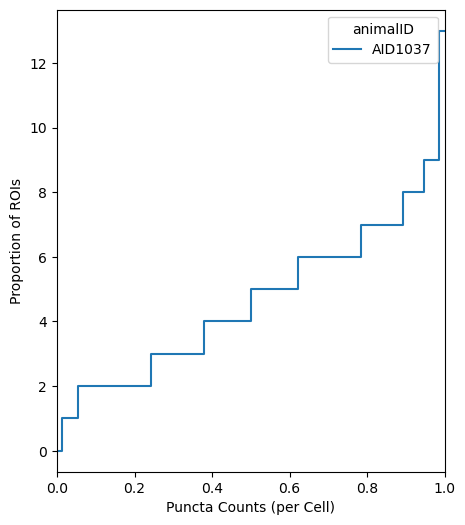

In [93]:
# PLOT CDF OF MXFCs 
plt.figure(figsize=(5, 6))
ax = sns.ecdfplot(data=dfAll,y='Count', hue="animalID", stat='proportion')
ax.set(xlabel='Puncta Counts (per Cell)', ylabel='Proportion of ROIs')
#ax.set(xlim=(0,0.6), ylim=(0, 1))
#plt.legend(title='Genotype', loc='best', labels=['Wildtype', 'Bclw-/-'])
#leg = ax.get_legend()
#leg.legend_handles[0].set_color(legendcolors[0])
#leg.legend_handles[1].set_color(legendcolors[1])
plt.savefig(dirTR+fnBase+".ECDF.png",  bbox_inches='tight', dpi = 300,
            format = "png")

In [94]:
# Analyze Puncta Counts normalized to cell area
dfAll["PC_Area"]=dfAll["Count"]/dfAll["Area"]
print(dfAll)

          Count       ImageName  ROI_ID     Area      Mean  Min    Max  \
0      1      3  CYS_002.S4.TS3       1   81.847  1085.694  124   6202   
1      2      3  CYS_002.S4.TS3       2   96.859  1011.496   91  10915   
2      3      6  CYS_002.S4.TS3       3   96.591  1153.475   97   6598   
3      4      5  CYS_002.S4.TS3       4   73.185  1001.697  107   7926   
4      5      4  CYS_002.S4.TS3       5   98.294   815.238   99   5076   
..   ...    ...             ...     ...      ...       ...  ...    ...   
143  144      4  CYS_002.S4.TS3     144  103.282  1235.408  154   7867   
144  145      4  CYS_002.S4.TS3     145   76.592  1564.384  121   9933   
145  146      5  CYS_002.S4.TS3     146   89.584  1094.020   90  13852   
146  147      7  CYS_002.S4.TS3     147  102.795  1338.382  145  16586   
147  148      2  CYS_002.S4.TS3     148   61.142  1307.678  159   5275   

          Std animalID                 geno sex  age   PC_Area  
0    1004.333  AID1037  Ntng1Cre+/-;Ai14+/-   

/usr/local/Caskroom/miniconda/base/envs/QISHA/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x600 with 0 Axes>

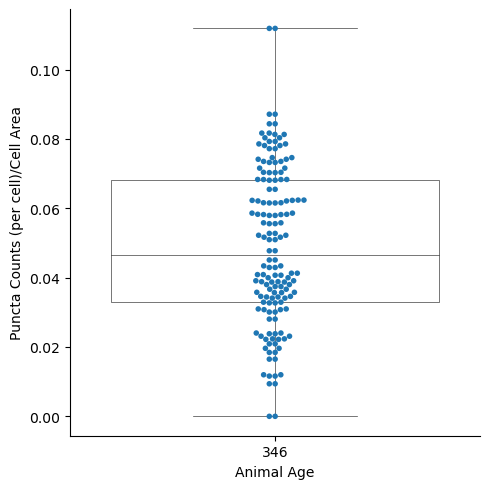

In [99]:
plt.figure(figsize=(4, 6))
sns.catplot(x='age',y='PC_Area', hue="animalID", 
            data=dfAll, kind="box",boxprops={'facecolor':'None'},linewidth=.5, 
            dodge=False, order=order, legend = False)
ax = sns.swarmplot(x='age', y='PC_Area',hue="animalID", 
                   data=dfAll, 
                   dodge = False, size=4,  order=order, legend =False)
ax.set(xlabel='Animal Age', ylabel='Puncta Counts (per cell)/Cell Area')
#ax.set(ylim=(0, 0.6))
#plt.xticks(rotation=45)
plt.savefig(dirTR+fnBase+".PC_Area.png",  bbox_inches='tight', dpi = 300,
            format = "png")

/usr/local/Caskroom/miniconda/base/envs/QISHA/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x600 with 0 Axes>

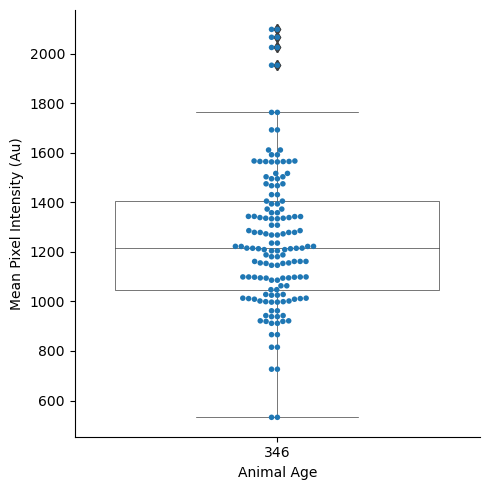

In [100]:
# Mean Pixel Intensity
plt.figure(figsize=(4, 6))
sns.catplot(x='age',y='Mean', hue="animalID", 
            data=dfAll, kind="box",boxprops={'facecolor':'None'},linewidth=.5, 
            dodge=False, order=order, legend = False)
ax = sns.swarmplot(x='age', y='Mean',hue="animalID", 
                   data=dfAll, 
                   dodge = False, size=4,  order=order, legend =False)
ax.set(xlabel='Animal Age', ylabel='Mean Pixel Intensity (Au)')
#ax.set(ylim=(0, 0.6))
#plt.xticks(rotation=45)
plt.savefig(dirTR+fnBase+".MeanPixIntensity.png",  bbox_inches='tight', dpi = 300,
            format = "png")

/usr/local/Caskroom/miniconda/base/envs/QISHA/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x600 with 0 Axes>

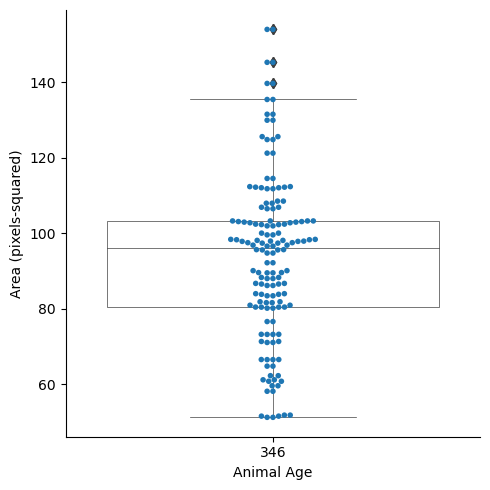

In [101]:
# Area
plt.figure(figsize=(4, 6))
sns.catplot(x='age',y='Area', hue="animalID", 
            data=dfAll, kind="box",boxprops={'facecolor':'None'},linewidth=.5, 
            dodge=False, order=order, legend = False)
ax = sns.swarmplot(x='age', y='Area',hue="animalID", 
                   data=dfAll, 
                   dodge = False, size=4,  order=order, legend =False)
ax.set(xlabel='Animal Age', ylabel='Area (pixels-squared)')
#ax.set(ylim=(0, 0.6))
#plt.xticks(rotation=45)
plt.savefig(dirTR+fnBase+".Area.png",  bbox_inches='tight', dpi = 300,
            format = "png")